# Geolocated dataset maps

We aim to look at Facebook discussions heterogeneity accross France at the local scale.
We provide here a territorial analysis of the "geolocated" and "PA geoloacted" datasets at the BV and department level.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
path = "/Users/clem/Documents/Memoire"
fb_sentences_loc = pd.read_csv(path + '/Data/Facebook/fb_sentences_loc.csv')
fb_sentences_loc_PA = pd.read_csv(path + "/Data/Facebook/fb_sentences_loc_PA.csv")

### 1. CDF per department

For discussions of the whole geolocated dataset :

In [17]:
fb_sentences_loc['date'] = pd.to_datetime(fb_sentences_loc['date'])
fb_sentences_loc['restrict_date'] = fb_sentences_loc['date'].dt.date
fb_sentences_loc['restrict_date'] = pd.to_datetime(fb_sentences_loc['restrict_date'])

fb_sentences_loc_PA['date'] = pd.to_datetime(fb_sentences_loc_PA['date'])
fb_sentences_loc_PA['restrict_date'] = fb_sentences_loc_PA['date'].dt.date
fb_sentences_loc_PA['restrict_date'] = pd.to_datetime(fb_sentences_loc_PA['restrict_date'])

In [18]:
fb_sentences_loc = fb_sentences_loc.dropna(subset=['DEP'])
fb_sentences_loc = fb_sentences_loc[fb_sentences_loc['DEP'] != '2A']
fb_sentences_loc= fb_sentences_loc[fb_sentences_loc['DEP'] != '2B']
fb_sentences_loc['DEP'] = fb_sentences_loc['DEP'].astype(int)
fb_sentences_loc_bis = fb_sentences_loc[fb_sentences_loc['DEP'].between(0, 90)]
fb_sentences_loc_bis = fb_sentences_loc_bis.sort_values('DEP')
fb_sentences_loc_bis['restrict_date'] = pd.to_datetime(fb_sentences_loc_bis['restrict_date'])

count_sent_by_week = fb_sentences_loc_bis.groupby(pd.Grouper(key='restrict_date', freq='W')).size()
count_sent_by_week = count_sent_by_week.to_frame(name='count')
count_sent_by_week['cumulative_count'] = count_sent_by_week['count'].cumsum()
count_sent_by_week['cumulative_proportion'] = count_sent_by_week['cumulative_count']/count_sent_by_week['cumulative_count'][-1]

group_sent_dep_week = fb_sentences_loc_bis.groupby([pd.Grouper(key='restrict_date', freq='W'), 'DEP']).size().reset_index(name='count')
group_sent_dep_week = group_sent_dep_week.sort_values('restrict_date')
group_sent_dep_week['cumulative_count'] = group_sent_dep_week.groupby('DEP')['count'].cumsum()
group_sent_dep_week['cumulative_proportion'] = group_sent_dep_week.groupby('DEP')['cumulative_count'].transform(lambda x: x / x.max())
group_sent_dep_week['restrict_date'] = pd.to_datetime(group_sent_dep_week['restrict_date'])

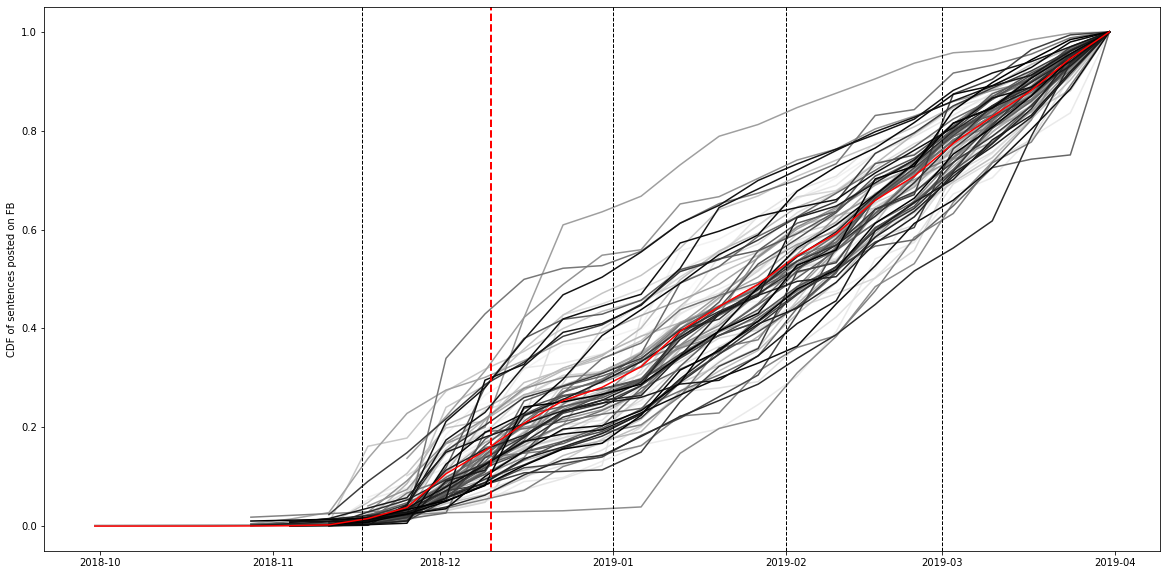

In [19]:
fig, ax = plt.subplots(figsize=(20, 10))

cmap = plt.cm.get_cmap('Greys')

num_departments = len(group_sent_dep_week['DEP'].unique())

for i, (department, data) in enumerate(group_sent_dep_week.groupby('DEP')):
    # Compute the color index based on the department index
    color_index = i / (num_departments - 1)
    color = cmap(color_index)
    
    ax.plot(data['restrict_date'], data['cumulative_proportion'], label=department, color=color)


ax.plot(count_sent_by_week.index, count_sent_by_week['cumulative_proportion'], label='Whole Dataset', color='red')

# Set labels and title
ax.set_ylabel('CDF of sentences posted on FB', color='black')

# Set time ticks
ax.axvline(pd.to_datetime('2018-11-17'), color='black', linestyle='--', lw=1)
ax.axvline(pd.to_datetime('2018-12-10'), color='red', linestyle='--', lw=2)
ax.axvline(pd.to_datetime('2019-01-01'), color='black', linestyle='--', lw=1)
ax.axvline(pd.to_datetime('2019-02-01'), color='black', linestyle='--', lw=1)
ax.axvline(pd.to_datetime('2019-03-01'), color='black', linestyle='--', lw=1)

# Add legend
#plt.legend(loc='upper right')

# Show and save the plot
plt.savefig(path + '/Output/Graphs/PA_loc_dataset/CDF_loc_dep_week.png', dpi=300)

For discussions of the PA geolocated dataset :

In [20]:
fb_sentences_loc_PA = fb_sentences_loc_PA.dropna(subset=['DEP'])
fb_sentences_loc_PA = fb_sentences_loc_PA[fb_sentences_loc_PA['DEP'] != '2A']
fb_sentences_loc_PA = fb_sentences_loc_PA[fb_sentences_loc_PA['DEP'] != '2B']
fb_sentences_loc_PA['DEP'] = fb_sentences_loc_PA['DEP'].astype(int)
fb_sentences_loc_PAbis = fb_sentences_loc_PA[fb_sentences_loc_PA['DEP'].between(0, 90)]
fb_sentences_loc_PAbis = fb_sentences_loc_PAbis.sort_values('DEP')
fb_sentences_loc_PAbis['restrict_date'] = pd.to_datetime(fb_sentences_loc_PAbis['restrict_date'])

count_sent_by_week = fb_sentences_loc_PAbis.groupby(pd.Grouper(key='restrict_date', freq='W')).size()
count_sent_by_week = count_sent_by_week.to_frame(name='count')
count_sent_by_week['cumulative_count'] = count_sent_by_week['count'].cumsum()
count_sent_by_week['cumulative_proportion'] = count_sent_by_week['cumulative_count']/count_sent_by_week['cumulative_count'][-1]

group_sent_dep_week = fb_sentences_loc_PAbis.groupby([pd.Grouper(key='restrict_date', freq='W'), 'DEP']).size().reset_index(name='count')
group_sent_dep_week = group_sent_dep_week.sort_values('restrict_date')
group_sent_dep_week['cumulative_count'] = group_sent_dep_week.groupby('DEP')['count'].cumsum()
group_sent_dep_week['cumulative_proportion'] = group_sent_dep_week.groupby('DEP')['cumulative_count'].transform(lambda x: x / x.max())
group_sent_dep_week['restrict_date'] = pd.to_datetime(group_sent_dep_week['restrict_date'])

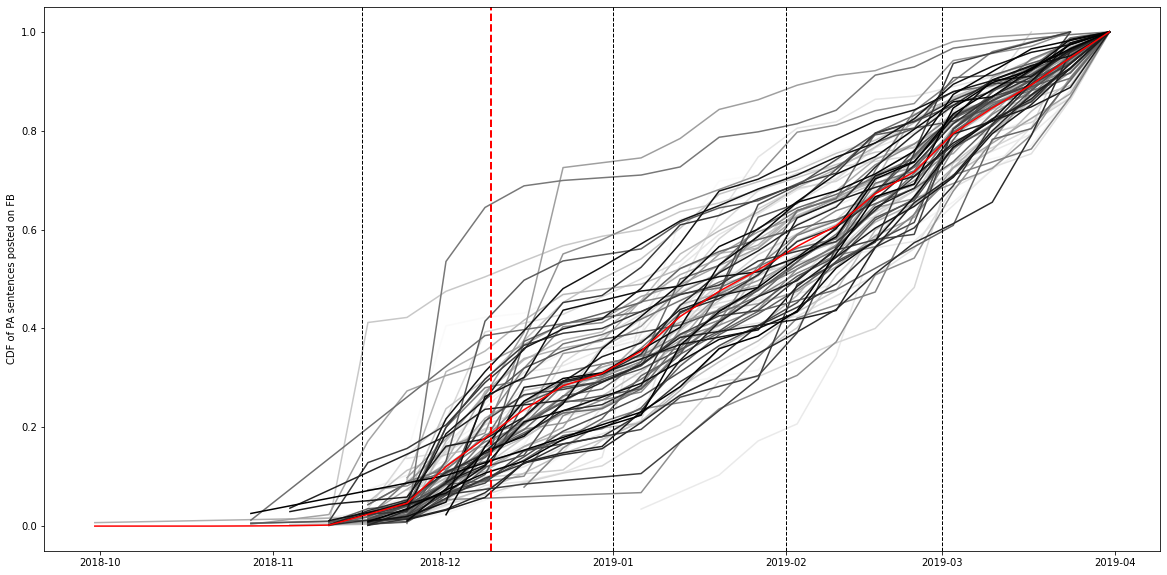

In [21]:
fig, ax = plt.subplots(figsize=(20, 10))

cmap = plt.cm.get_cmap('Greys')

num_departments = len(group_sent_dep_week['DEP'].unique())

for i, (department, data) in enumerate(group_sent_dep_week.groupby('DEP')):
    # Compute the color index based on the department index
    color_index = i / (num_departments - 1)
    color = cmap(color_index)
    
    ax.plot(data['restrict_date'], data['cumulative_proportion'], label=department, color=color)


ax.plot(count_sent_by_week.index, count_sent_by_week['cumulative_proportion'], label='Whole Dataset', color='red')

# Set labels and title
ax.set_ylabel('CDF of PA sentences posted on FB', color='black')

# Set time ticks
ax.axvline(pd.to_datetime('2018-11-17'), color='black', linestyle='--', lw=1)
ax.axvline(pd.to_datetime('2018-12-10'), color='red', linestyle='--', lw=2)
ax.axvline(pd.to_datetime('2019-01-01'), color='black', linestyle='--', lw=1)
ax.axvline(pd.to_datetime('2019-02-01'), color='black', linestyle='--', lw=1)
ax.axvline(pd.to_datetime('2019-03-01'), color='black', linestyle='--', lw=1)

# Add legend and show the plot
#plt.legend(loc='upper right')
plt.savefig(path + '/Output/Graphs/PA_loc_dataset/CDF_loc_PA_dep_week.png')


### 2. Dataset for maps : geolocated sentences at the department level

We chose to analyze Facebook discussions at the department level as it provides a less disaggregated unit of analysis : due to our relatively small dataset, focusing on the department level allows us to have a sufficient number of values for analysis.

We create dataset for showing maps and for our futur study of correlation with :
- Number of geolocated sentences per department
- Number of geolocated messages per department
- Number of geolocated PA sentences per department
- Number of geolocated PA messages per department
- Mean sentiment polarity of geolocalisated sentences per department
- Mean sentiment polarity of geolocalisated PA sentences per department
(We  add a sentiment polarity score per department, to get the local "sentiment" of Facebook discussion)

We do that for the total period, and also per month (to get a panel)

In [22]:
# 1. Geolocated dataset
# Group the data by department and calculate the count of sentences and unique messages
sentences_dep = fb_sentences_loc.groupby('DEP').agg({'sentence_raw': 'nunique', 'message_id': 'nunique', 'sentiment_vader': 'mean'})
# Rename the columns
sentences_dep = sentences_dep.rename(columns={'sentence_raw': 'Total Sentences Geo', 'message_id': 'Total Messages Geo',
                                              'sentiment_vader': 'Sentiment Geo'})
# Reset the index
sentences_dep = sentences_dep.reset_index()
# Length
print(len(sentences_dep))


# 2. PA geolocated dataset
# Group the data by department and calculate the count of sentences and unique messages
sentences_dep_PA = fb_sentences_loc_PA.groupby('DEP').agg({'sentence_raw': 'nunique', 'message_id': 'nunique', 'sentiment_vader': 'mean'})
# Rename the columns
sentences_dep_PA = sentences_dep_PA.rename(columns={'sentence_raw': 'Total Sentences Filtered', 'message_id': 'Total Messages Filtered',
                                                                 'sentiment_vader': 'Sentiment Filtered'})
# Reset the index
sentences_dep_PA = sentences_dep_PA.reset_index()
# Length
print(len(sentences_dep_PA))


# 3. Merge to one dataset
sentences_dep = pd.merge(sentences_dep, sentences_dep_PA, how='left', on='DEP')
print(len(sentences_dep))

# One missing value (for one departement) for the filtered PA dataset 
sentences_dep.to_csv(path + '/Data/Stata/sentences_dep.csv')

100
100
100


In [23]:
# 1. Geolocated dataset
fb_sentences_loc['date'] = pd.to_datetime(fb_sentences_loc['date'])
fb_sentences_loc = fb_sentences_loc.rename(columns={'sentence_clean': 'Total Sentences Geo', 'message_id': 'Total Messages Geo',
                                                                 'sentiment_vader': 'Sentiment Geo'})

# Group the filtered data by department and month, and calculate the count of sentences and unique messages
sentences_dep_month = fb_sentences_loc.groupby(['DEP', pd.Grouper(key='date', freq='M')]).agg({'Total Sentences Geo': 'count', 'Total Messages Geo': 'nunique', 'Sentiment Geo': 'mean'})
sentences_dep_month = sentences_dep_month.reset_index()

sentences_dep_month_piv = sentences_dep_month.pivot(index='DEP', columns='date', values=['Total Sentences Geo', 'Total Messages Geo', 'Sentiment Geo' ])
sentences_dep_month_piv.columns = [f"{col[0]}_{col[1].strftime('%Y-%m-%d')}" if not pd.isnull(col[1]) else col[0] for col in sentences_dep_month_piv.columns]

new_columns = {}
for column in sentences_dep_month_piv.columns:
    # Extract the first five characters
    new_name = column[:-3] + '-geo'
    # Store the mapping of old column name to new column name
    new_columns[column] = new_name

sentences_dep_month_piv = sentences_dep_month_piv.rename(columns=new_columns)
sentences_dep_month_piv = sentences_dep_month_piv.reset_index()


# 2. PA geolocated dataset
fb_sentences_loc_PA['date'] = pd.to_datetime(fb_sentences_loc_PA['date'])
fb_sentences_loc_PA = fb_sentences_loc_PA.rename(columns={'sentence_clean': 'Total Sentences Filtered', 'message_id': 'Total Messages Filtered',
                                                                 'sentiment_vader': 'Sentiment Filtered'})

# Group the filtered data by department and month, and calculate the count of sentences and unique messages
sentences_dep_PA_month = fb_sentences_loc_PA.groupby(['DEP', pd.Grouper(key='date', freq='M')]).agg({'Total Sentences Filtered': 'count', 'Total Messages Filtered': 'nunique', 'Sentiment Filtered': 'mean'})
sentences_dep_PA_month = sentences_dep_PA_month.reset_index()

sentences_dep_PA_month_piv = sentences_dep_PA_month.pivot(index='DEP', columns='date', values=['Total Sentences Filtered', 'Total Messages Filtered', 'Sentiment Filtered'])
sentences_dep_PA_month_piv.columns = [f"{col[0]}_{col[1].strftime('%Y-%m-%d')}" if not pd.isnull(col[1]) else col[0] for col in sentences_dep_PA_month_piv.columns]
new_columns = {}
for column in sentences_dep_PA_month_piv.columns:
    # Extract the first five characters
    new_name = column[:-3] + '-filtered'
    # Store the mapping of old column name to new column name
    new_columns[column] = new_name

sentences_dep_PA_month_piv = sentences_dep_PA_month_piv.rename(columns=new_columns)
sentences_dep_PA_month_piv = sentences_dep_PA_month_piv.reset_index()

sentences_dep_PA_month_piv.head()

# 3. Merge to one dataset
sentences_dep_month = pd.merge(sentences_dep_month_piv, sentences_dep_PA_month_piv, how='left', on='DEP')
print(len(sentences_dep_month))

# One missing value (for one departement) for the filtered PA dataset 
sentences_dep_month.to_csv(path + '/Data/Stata/sentences_dep_month.csv')

100


### 2. Dataset for panel : geolocated sentences/PA at the department level

Geolocated monthly sentences :

In [80]:
fb_sentences_loc['date'] = pd.to_datetime(fb_sentences_loc['date'])
fb_sentences_loc = fb_sentences_loc.rename(columns={'sentence_clean': 'Total Sentences Geo', 'message_id': 'Total Messages Geo',
                                                                 'sentiment_vader': 'Sentiment Geo'})

# Group the filtered data by department and month, and calculate the count of sentences and unique messages
sentences_dep_month = fb_sentences_loc.groupby(['DEP', pd.Grouper(key='date', freq='M')]).agg({'Total Sentences Geo': 'count', 'Total Messages Geo': 'nunique', 'Sentiment Geo': 'mean'})
sentences_dep_month = sentences_dep_month.reset_index()

fb_sentences_loc_PA['date'] = pd.to_datetime(fb_sentences_loc_PA['date'])
fb_sentences_loc_PA = fb_sentences_loc_PA.rename(columns={'sentence_clean': 'Total Sentences Filtered', 'message_id': 'Total Messages Filtered',
                                                                 'sentiment_vader': 'Sentiment Filtered'})

# Group the filtered data by department and month, and calculate the count of sentences and unique messages
sentences_dep_PA_month = fb_sentences_loc_PA.groupby(['DEP', pd.Grouper(key='date', freq='M')]).agg({'Total Sentences Filtered': 'count', 'Total Messages Filtered': 'nunique', 'Sentiment Filtered': 'mean'})
sentences_dep_PA_month = sentences_dep_PA_month.reset_index()


In [81]:
# Column of month/year dates
sentences_dep_month['restricted_date'] = pd.to_datetime(sentences_dep_month['date'], format='%Y-%m').dt.strftime('%Y-%m')

sentences_dep_PA_month['restricted_date'] = pd.to_datetime(sentences_dep_PA_month['date'], format='%Y-%m').dt.strftime('%Y-%m')

In [83]:
sentences = pd.merge(sentences_dep_month, sentences_dep_PA_month, on=['DEP', 'restricted_date', 'date'])

In [84]:
sentences.head()

,DEP,date,Total Sentences Geo,Total Messages Geo,Sentiment Geo,restricted_date,Total Sentences Filtered,Total Messages Filtered,Sentiment Filtered
0,1,2018-11-30 00:00:00+00:00,52,20,0.143640,2018-11,14,9,0.227414
1,1,2018-12-31 00:00:00+00:00,113,61,0.004900,2018-12,33,21,0.036994
2,1,2019-01-31 00:00:00+00:00,91,60,0.020340,2019-01,24,22,0.016988
3,1,2019-02-28 00:00:00+00:00,199,112,0.043294,2019-02,70,47,0.147631
4,1,2019-03-31 00:00:00+00:00,108,84,-0.055916,2019-03,24,23,0.005992


Monthly PA indicators :


In [85]:
PA = pd.read_stata("/Users/clem/Documents/Memoire/Data/Stata/agg_table_regall_by_date_and_bv2012.dta")

In [86]:
# Column for merge
PA['restricted_date'] = pd.to_datetime(PA['date'], format='%Y-%m').dt.strftime('%Y-%m')
PA['DEP'] = PA['BV2012']/1000
PA['DEP']=PA['DEP'].astype(int)

In [89]:
PA = PA[['BV2012', 'date', 'DEP', 'restricted_date', 'm_ppa_simule', 'm_ppa_simule_contrefact', 'm_mtppaver', 'm_d_ppa_contrefact','mtppaver', 'nb_obs', 
 'eligible_ppa', 'eligible_ppa_contrefact', 'benef_ppa', 'family_type_1', 'family_type_2','family_type_3',
'family_type_4', 'family_type_5', 'family_type_6']]

In [90]:
panel = pd.merge(PA,sentences, on=['DEP', 'restricted_date'])

In [91]:
panel.head()

,BV2012,date_x,DEP,restricted_date,m_ppa_simule,m_ppa_simule_contrefact,m_mtppaver,m_d_ppa_contrefact,mtppaver,nb_obs,...,family_type_4,family_type_5,family_type_6,date_y,Total Sentences Geo,Total Messages Geo,Sentiment Geo,Total Sentences Filtered,Total Messages Filtered,Sentiment Filtered
0,49301,2018-12-30,49,2018-12,17.832667,17.832667,20.887515,0.0,159643.28,7643,...,78.0,645,3946,2018-12-31 00:00:00+00:00,149,77,-0.03667,40,21,-0.033537
1,49176,2018-12-30,49,2018-12,19.508662,19.508662,22.697394,0.0,51818.15,2283,...,26.0,168,1239,2018-12-31 00:00:00+00:00,149,77,-0.03667,40,21,-0.033537
2,49007,2018-12-30,49,2018-12,25.658284,25.658284,28.567972,0.0,2543378.01,89029,...,789.0,6563,19585,2018-12-31 00:00:00+00:00,149,77,-0.03667,40,21,-0.033537
3,49018,2018-12-30,49,2018-12,25.813151,25.813151,29.016092,0.0,97871.28,3373,...,56.0,303,1419,2018-12-31 00:00:00+00:00,149,77,-0.03667,40,21,-0.033537
4,49127,2018-12-30,49,2018-12,25.650677,25.650677,30.601758,0.0,64233.09,2099,...,34.0,207,1054,2018-12-31 00:00:00+00:00,149,77,-0.03667,40,21,-0.033537


In [92]:
panel.to_csv(path + '/Data/Stata/panel_reg.csv')